In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

###
## Start off with the simple stuff, i.e. EDA and grouping and data visualisation on the dataset as a whole
# Advanced/Stretch:
# Learn requests
# Learn how to authenticate against OpenAI
# Create some embeddings
# Learn how to do embeddings similarity

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# Load the dataset

df = pd.read_csv('imdb_top_1000.csv')

print("The shape of the dataset is: {} rows and {} columns".format(df.shape[0], df.shape[1]))


The shape of the dataset is: 1000 rows and 16 columns


In [ ]:
# Show the first 4 rows of the dataset
df.head(4)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"


In [ ]:
# Show how many null values are in each column
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [ ]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [ ]:
# Change Gross into a string and remove ','
df['Gross'] = df['Gross'].astype(str).str.replace(',', '')

# Replace Nan with 0 and into int
df['Gross'] = df['Gross'].replace('nan', '0')

df['Gross'].head(4)

0     28341469
1    134966411
2    534858444
3     57300000
Name: Gross, dtype: object

In [ ]:
# Change Gross into int
df['Gross'] = df['Gross'].astype(int)

# Remove Poster_Link as it is not needed for EDA
df = df.drop('Poster_Link', axis=1)

In [ ]:
# rename series_title to movie_title
df = df.rename(columns={'Series_Title': 'Movie_Title'})

# remove the year from the movie title

#show the first 4 rows of the movie title
df['Movie_Title'].head()

0    The Shawshank Redemption
1               The Godfather
2             The Dark Knight
3      The Godfather: Part II
4                12 Angry Men
Name: Movie_Title, dtype: object

In [ ]:
df['Runtime'] = df['Runtime'].str.replace(' min', '')

# Change Released_Year to datetime
#df['Released_Year'] = pd.to_datetime(df['Released_Year'], format='%Y')


In [ ]:
df['Runtime'] = df['Runtime'].astype(int)

In [ ]:
df.head()

,Movie_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [ ]:
# Show 'PG' in Released Year
df[df['Released_Year'] == 'PG']

,Movie_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933


In [ ]:
# Change 'PG' to 1995
df['Released_Year'] = df['Released_Year'].replace('PG', '1995')

In [ ]:
# Change Released_Year from object to datetime
df['Released_Year'] = pd.to_datetime(df['Released_Year'], format='%Y')

In [ ]:
# show the first 4 rows of the dataset and the dtypes:
df.head(4)

,Movie_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994-01-01,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972-01-01,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008-01-01,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974-01-01,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000


In [ ]:
df.isnull().sum()

Movie_Title        0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
dtype: int64

In [ ]:
# Remove the rows with null values to create usable data
df = df.dropna()


In [ ]:
df.dtypes

Movie_Title              object
Released_Year    datetime64[ns]
Certificate              object
Runtime                   int64
Genre                    object
IMDB_Rating             float64
Overview                 object
Meta_score              float64
Director                 object
Star1                    object
Star2                    object
Star3                    object
Star4                    object
No_of_Votes               int64
Gross                     int64
dtype: object

In [ ]:
# Check to see if there are any duplicates in the Movie_Title column
df.duplicated(subset=['Movie_Title']).sum()


0

In [ ]:
#count the number of rows
df.shape[0]

787

/var/folders/5m/969g9vzx5wqgtqw6jdkrd07r0000gn/T/ipykernel_34624/3918787377.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
/var/folders/5m/969g9vzx5wqgtqw6jdkrd07r0000gn/T/ipykernel_34624/3918787377.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

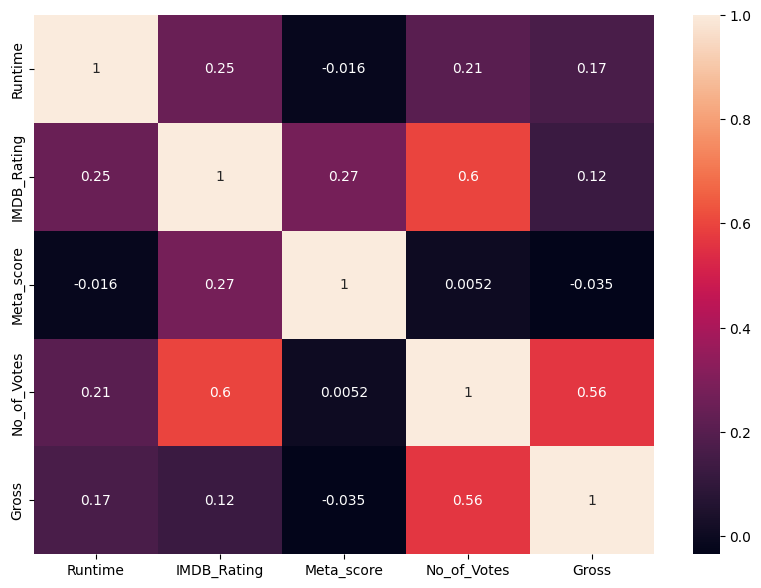

In [ ]:
# Check correlation between the columns
df.corr()

#heatmap for correlation

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)


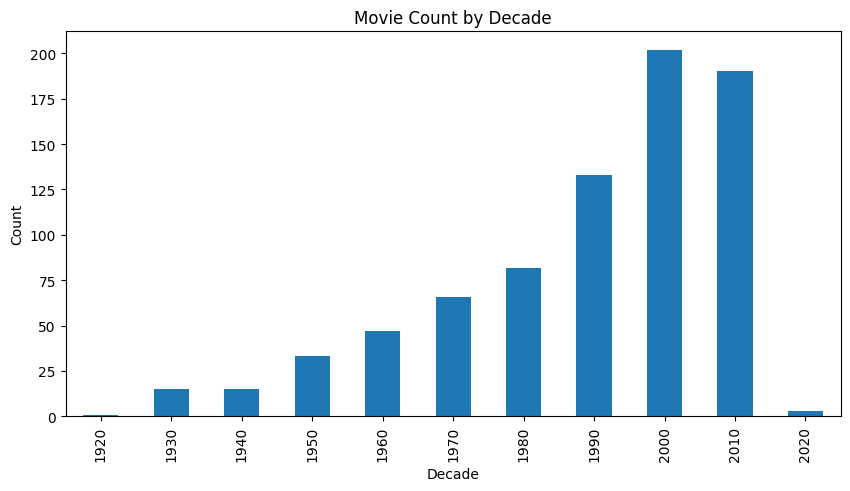

In [ ]:
# Create a new column called 'Decade' and assign the decade to each movie
df.loc[:, 'Decade'] = df['Released_Year'].dt.year // 10 * 10

# ** note --> this takes the year and divides it by 10 and then multiplies it by 10 to get the decade 1995 // 10 (199) * 10 = 1990

# Group by decade from 1920 to 2020
df_decade = df.groupby('Decade').count()

# Show on a bar chart the number of movies per decade
df_decade['Movie_Title'].plot(kind='bar', figsize=(10, 5), title='Movie Count by Decade')

# set the x-axis label
plt.xlabel('Decade')

# set the y-axis label
plt.ylabel('Count')

# show the plot
plt.show()


In [ ]:
# top voted movies top 10:
# sort the dataframe by the number of votes

top_voted = df.sort_values(['No_of_Votes'], ascending = False)


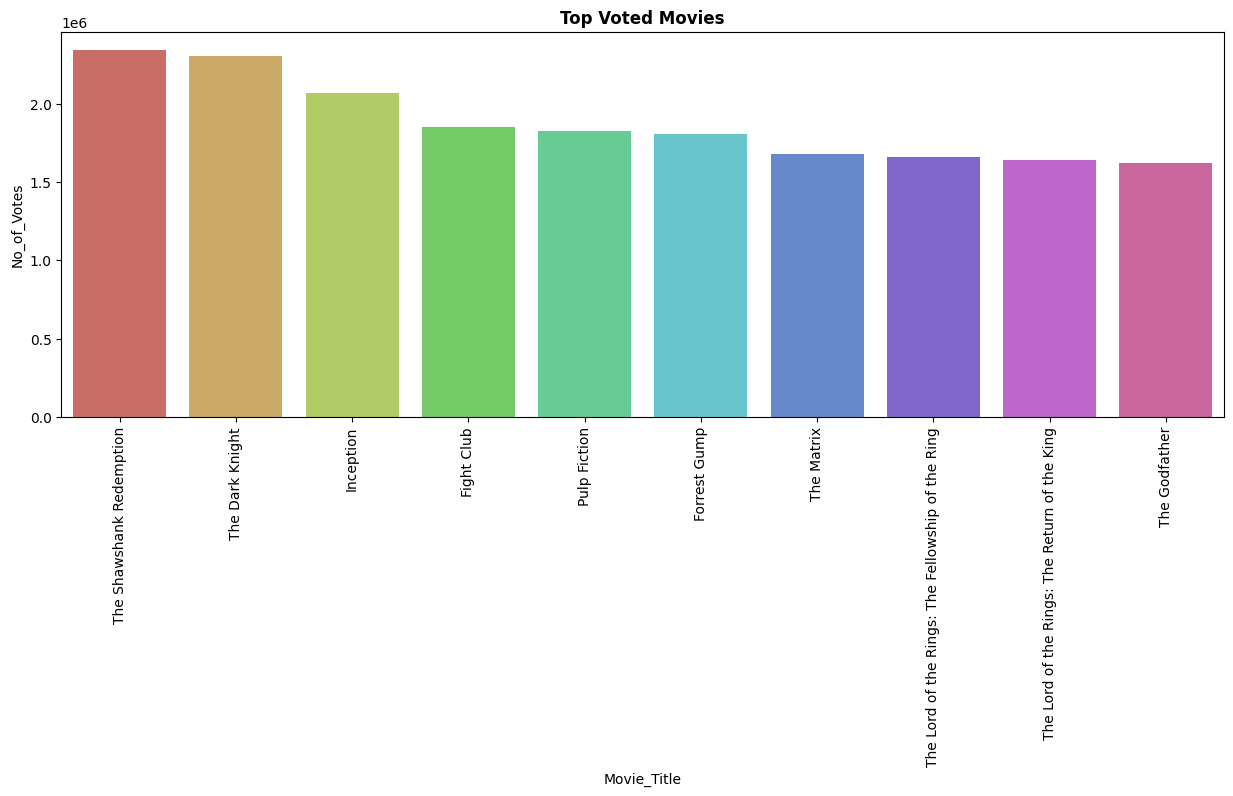

In [ ]:
# Show the top 10 movies with the most votes

fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movie_Title'][:10],y=top_voted['No_of_Votes'][:10], palette = 'hls')
g.set_xticklabels(g.get_xticklabels(), rotation=90) # set
g.set_title("Top Voted Movies", weight = "bold")
plt.show()

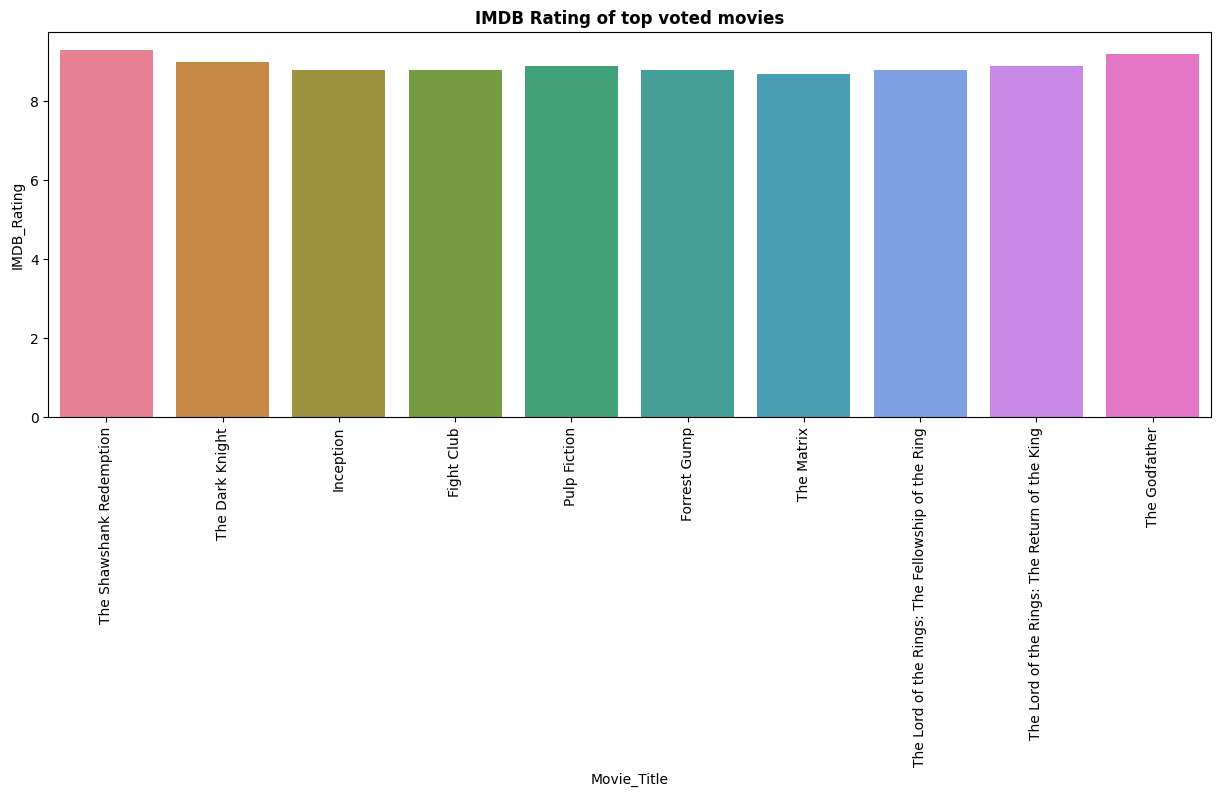

In [ ]:
# Show the top 10 movies with the highest IMDB rating
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movie_Title'][:10],y=top_voted['IMDB_Rating'][:10], palette = 'husl') # rote x axis labels 
g.set_xticklabels(g.get_xticklabels(), rotation=90) # set title
g.set_title("IMDB Rating of top voted movies", weight = "bold")
plt.show()

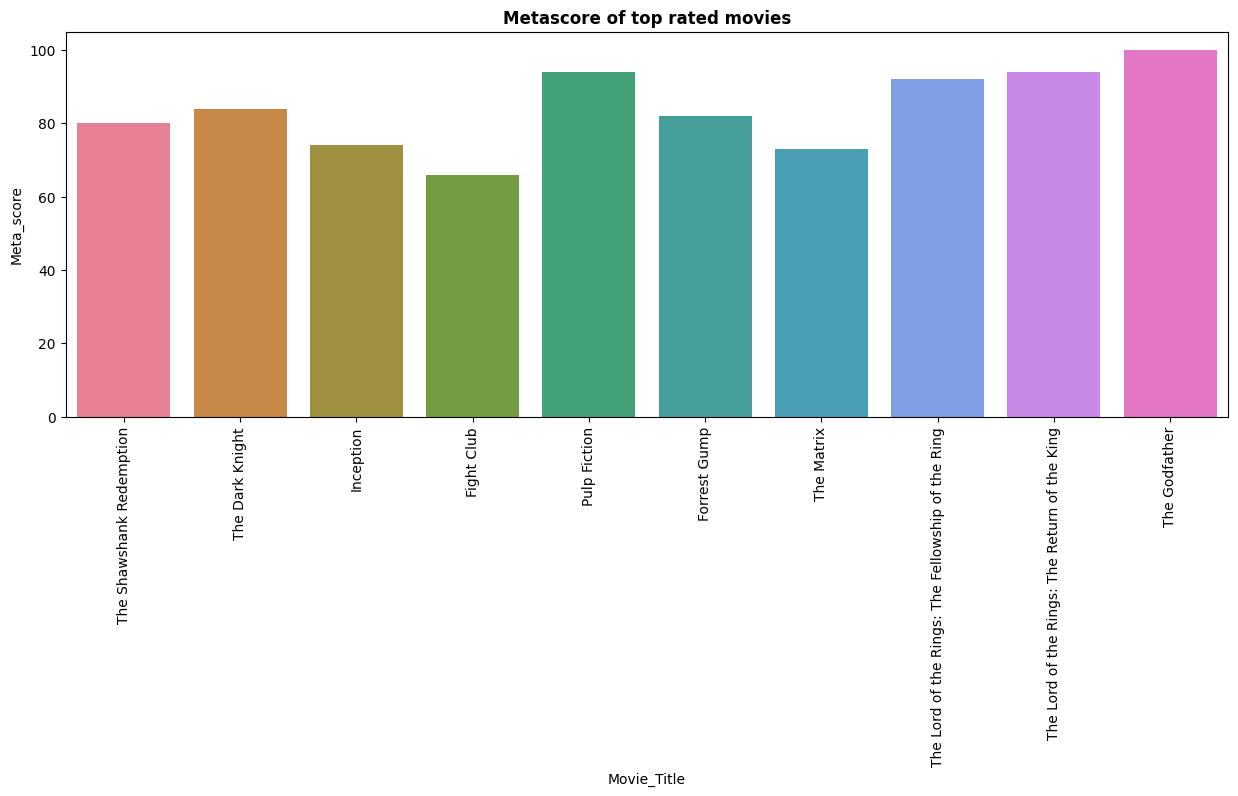

In [ ]:
# Show the top 10 movies by meta-score

fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movie_Title'][:10],y=top_voted['Meta_score'][:10], palette = 'husl')
g.set_xticklabels(g.get_xticklabels(), rotation=90) # set title
g.set_title("Metascore of top rated movies", weight = "bold")
plt.show()

In [ ]:


# Create a new column called 'Year' and assign the year to each movie
df.loc[:, 'Year'] = df['Released_Year'].dt.year

# Show Released_Year and Year
df[['Released_Year', 'Year']]

,Released_Year,Year
0,1994-01-01,1994
1,1972-01-01,1972
2,2008-01-01,2008
3,1974-01-01,1974
4,1957-01-01,1957
...,...,...
993,1966-01-01,1966
994,1964-01-01,1964
995,1961-01-01,1961
996,1956-01-01,1956


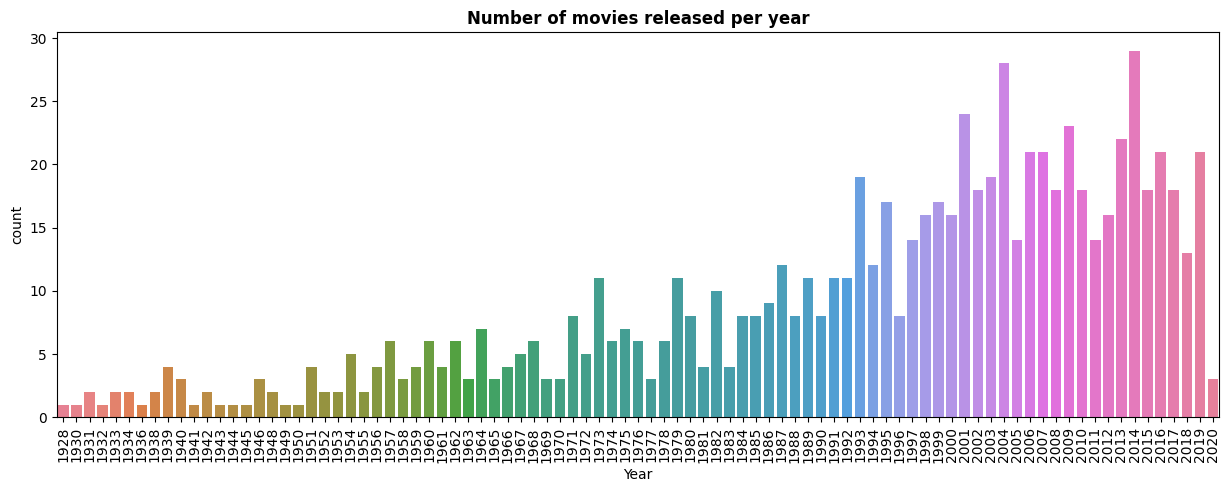

In [ ]:
# Show how many movies were released in each year - top 10 
fig,axs=plt.subplots(figsize=(15,5))
g=sns.countplot(x=df['Year'], palette = 'husl')
g.set_xticklabels(g.get_xticklabels(), rotation=90) # set title
g.set_title("Number of movies released per year", weight = "bold")
plt.show()


Summary:
Most of the movies in the top 1000 movies were made from middle 1990s to the late 2010's

In [ ]:
#Calculate the mean of the Runtime, IMDB_Rating, Meta_score, Gross, No_of_Votes
df.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Decade,Year
count,787.000000,787.000000,787.000000,7.870000e+02,7.870000e+02,787.000000,787.000000
mean,123.095299,7.935578,77.560356,3.310456e+05,7.123088e+07,1989.135959,1993.805591
std,27.023029,0.288331,12.300825,3.467667e+05,1.118550e+08,20.315966,20.410584
min,70.000000,7.600000,28.000000,2.522900e+04,0.000000e+00,1920.000000,1928.000000
25%,103.500000,7.700000,70.000000,8.218350e+04,3.563959e+06,1980.000000,1982.000000
50%,120.000000,7.900000,78.000000,2.062940e+05,2.640064e+07,2000.000000,2000.000000
75%,136.000000,8.100000,87.000000,4.655965e+05,8.932434e+07,2000.000000,2009.000000
max,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08,2020.000000,2020.000000


In [ ]:
# show the column genre top 10
df['Genre'].value_counts()[:10]


Drama                           63
Drama, Romance                  30
Comedy, Drama                   24
Crime, Drama, Thriller          23
Animation, Adventure, Comedy    23
Biography, Drama, History       23
Comedy, Drama, Romance          22
Action, Adventure, Sci-Fi       21
Action, Crime, Drama            21
Crime, Drama                    20
Name: Genre, dtype: int64

In [ ]:
df.dtypes

Movie_Title              object
Released_Year    datetime64[ns]
Certificate              object
Runtime                   int64
Genre                    object
IMDB_Rating             float64
Overview                 object
Meta_score              float64
Director                 object
Star1                    object
Star2                    object
Star3                    object
Star4                    object
No_of_Votes               int64
Gross                     int64
Decade                    int64
Year                      int64
dtype: object

In [ ]:
# Take df and create a new df called df_genre, 
# explode the genre column so that each movie has its own row for each genre
#split by comma
df_genre = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')
#df_genre = df.explode('Genre')

# Show the first 4 rows of the new df
df_genre.head(4)

# Show the number of movies per genre
df_genre['Genre'].value_counts()

# Show the number of movies per genre - top 10
df_genre['Genre'].value_counts()[:10]


Drama        556
Adventure    177
Comedy       176
Crime        156
Action       149
Thriller     107
Biography     97
Romance       97
Mystery       74
Animation     74
Name: Genre, dtype: int64

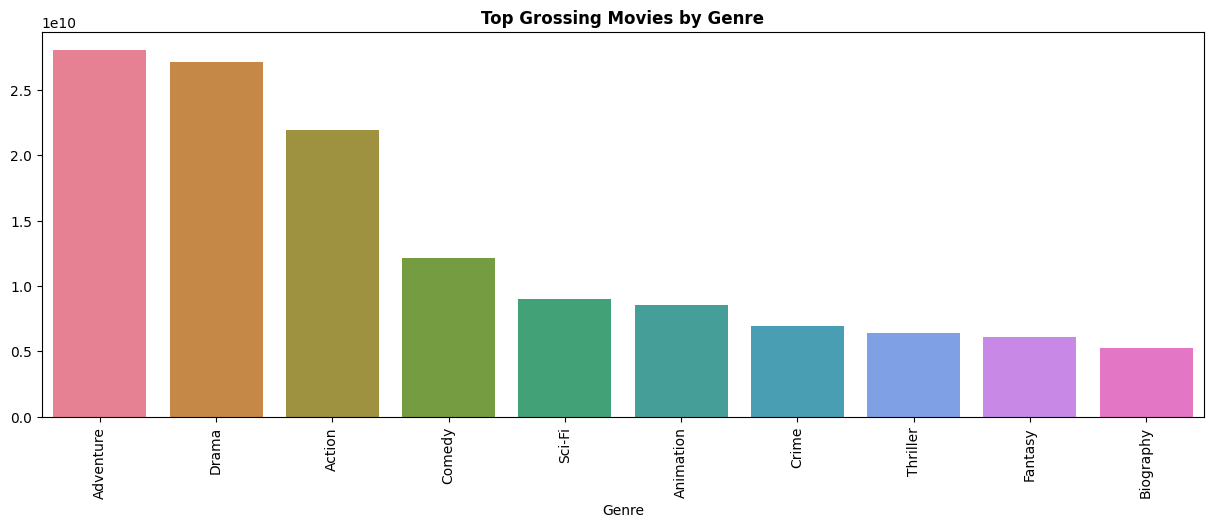

In [ ]:
#plot the top grossing 10 movies by genre using the df_genre dataframe

#group by genre and gross
df_genre_gross = df_genre.groupby('Genre')['Gross'].sum().sort_values(ascending=False)

#plot the top grossing 10 movies by genre using the df_genre dataframe
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=df_genre_gross[:10].index,y=df_genre_gross[:10].values, palette = 'husl')
g.set_xticklabels(g.get_xticklabels(), rotation=90) # set title
g.set_title("Top Grossing Movies by Genre", weight = "bold")
plt.show()


#using a line chart to show the number of movies released per year by genre



NameError: name 'df_genre_rating' is not defined

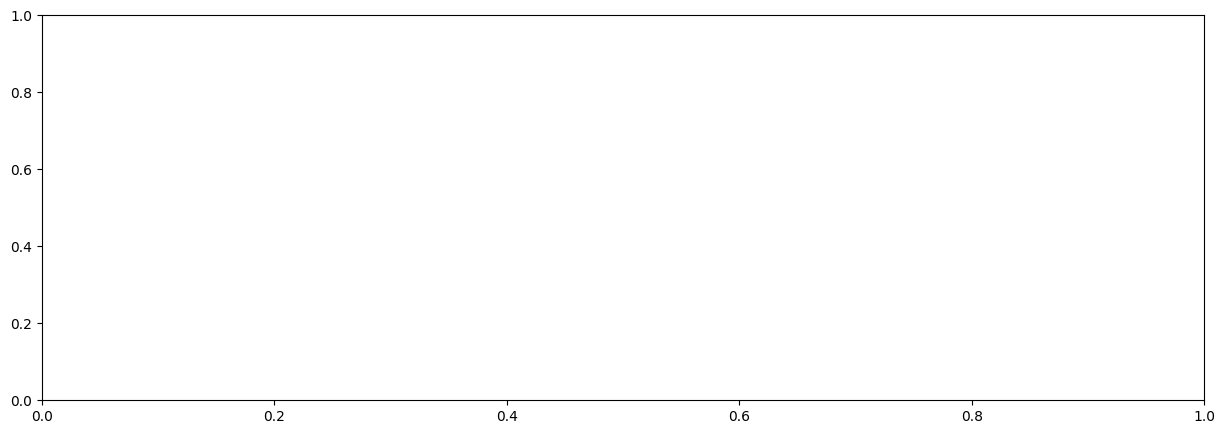

In [ ]:
import matplotlib.lines as mlines

fig, axs = plt.subplots(figsize=(15, 5))

# Plot the lines
husl_palette = sns.color_palette('husl', 2)

imdb_line = sns.lineplot(x=df_genre_rating.index, y=df_genre_rating.values, color=husl_palette[0])
meta_line = sns.lineplot(x=df_genre_meta.index, y=df_genre_meta.values, color=husl_palette[1])

# Create custom artists for the legend
imdb_artist = mlines.Line2D([], [], color=husl_palette[0])
meta_artist = mlines.Line2D([], [], color=husl_palette[1])

# Set the tick labels and title
axs.set_xticklabels(axs.get_xticklabels(), rotation=90)
axs.set_title("Top Rated Movies by Genre", weight="bold")

# Add the custom artists to the legend
axs.legend([imdb_artist, meta_artist], ['IMDB Rating', 'Meta Score'], 
           facecolor='white', framealpha=1, edgecolor='black')
plt.show()

In [ ]:
# what is the highest grossing movie?

# group by movie title and gross
df_gross = df.groupby('Movie_Title')['Gross'].sum().sort_values(ascending=False)

# show the top 10

# Print gross in $M
print(f'The highest grossing movie is {df_gross.index[0]} with a gross of ${df_gross.values[0]/1000000:.2f}M')

The highest grossing movie is Star Wars: Episode VII - The Force Awakens with a gross of $936.66M


In [ ]:
# What genre works best in the top 1000 movies
# group the data by decade and movie title and sum the gross
df_gross_decade = df.groupby(['Decade', 'Movie_Title'])['Gross'].sum().reset_index()

# get the highest grossing movie per decade
idx = df_gross_decade.groupby('Decade')['Gross'].idxmax()
df_gross_decade = df_gross_decade.loc[idx]

# filter out rows with zero gross
df_gross_decade = df_gross_decade[df_gross_decade['Gross'] != 0]

# format the gross as currency
df_gross_decade['Gross'] = df_gross_decade['Gross']

# show the movie title, decade and gross in a table
df_gross_decade[['Movie_Title', 'Decade', 'Gross']]




,Movie_Title,Decade,Gross
5,Gone with the Wind,1930,198676459
20,Fantasia,1940,76408097
35,Ben-Hur,1950,74700000
104,The Sound of Music,1960,163214286
157,Star Wars,1970,322740140
198,E.T. the Extra-Terrestrial,1980,435110554
379,Titanic,1990,659325379
409,Avatar,2000,760507625
737,Star Wars: Episode VII - The Force Awakens,2010,936662225


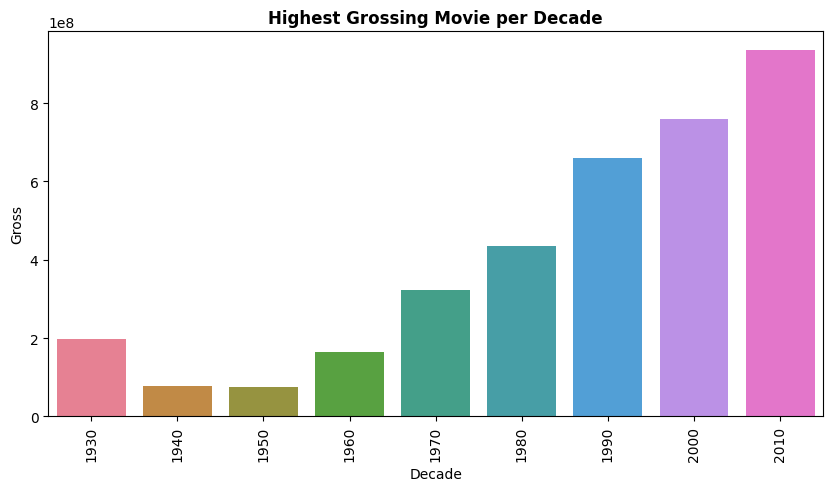

In [ ]:
# Take the df_gross_decade 
# take the decade and the gross and plot on a bar chart
fig,axs=plt.subplots(figsize=(10,5))
g=sns.barplot(x=df_gross_decade['Decade'],y=df_gross_decade['Gross'], palette = 'husl')
g.set_xticklabels(g.get_xticklabels(), rotation=90) # set title
g.set_title("Highest Grossing Movie per Decade", weight = "bold")
plt.show()


In [ ]:
df.head()

,Movie_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Decade,Year
0,The Shawshank Redemption,1994-01-01,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,1990,1994
1,The Godfather,1972-01-01,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,1970,1972
2,The Dark Knight,2008-01-01,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,2000,2008
3,The Godfather: Part II,1974-01-01,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,1970,1974
4,12 Angry Men,1957-01-01,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,1950,1957


In [ ]:
# How does the runtime of movies change over time?
# We need the runtime and the decade but sort by year
df_runtime = df[['Runtime', 'Year']].sort_values('Runtime', ascending=False)
df_runtime

,Runtime,Year
140,321,2012
314,238,1939
116,228,1962
247,224,2001
300,212,1959
...,...,...
395,76,1993
318,72,1928
694,72,1973
876,71,1933


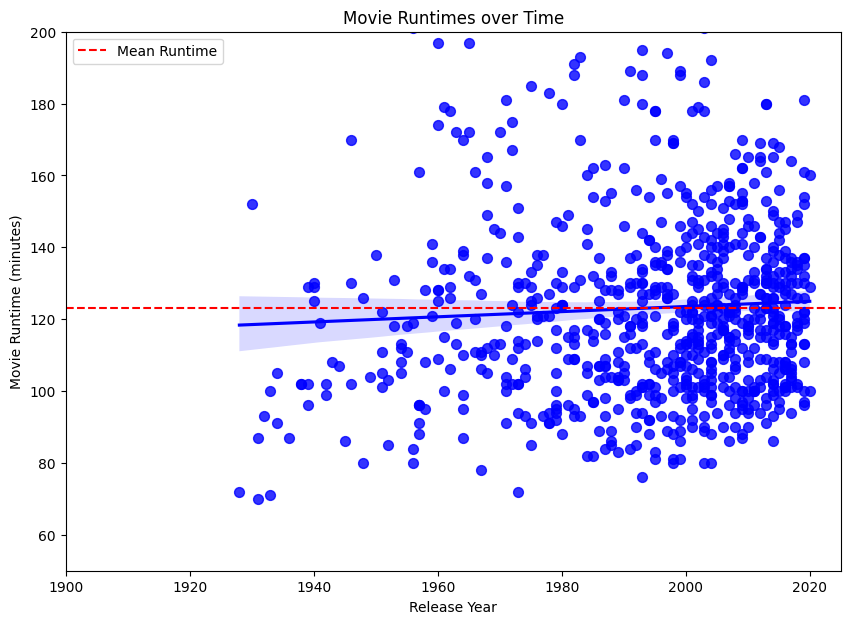

In [ ]:
# Calculate the mean runtime
mean_runtime = df['Runtime'].mean()

# Create a scatter plot with a trendline
fig, axs = plt.subplots(figsize=(10, 7))
sns.regplot(x='Year', y='Runtime', data=df, ax=axs, scatter_kws={'s': 50}, color='b')

# Add a mean line
plt.axhline(mean_runtime, color='r', linestyle='--', label='Mean Runtime')

# Set title and axis labels
plt.title('Movie Runtimes over Time')
plt.xlabel('Release Year')
plt.ylabel('Movie Runtime (minutes)')

# Adjust axis limits
plt.xlim(1900, 2025)
plt.ylim(50, 200)

# Add legend
plt.legend()

plt.show()

A slight upward slope suggests that on average, movies are getting longer over time. This could reflect changes in audience preferences or shifts in the film industry. 

Text(0.5, 1.0, 'Time Duration of movies')

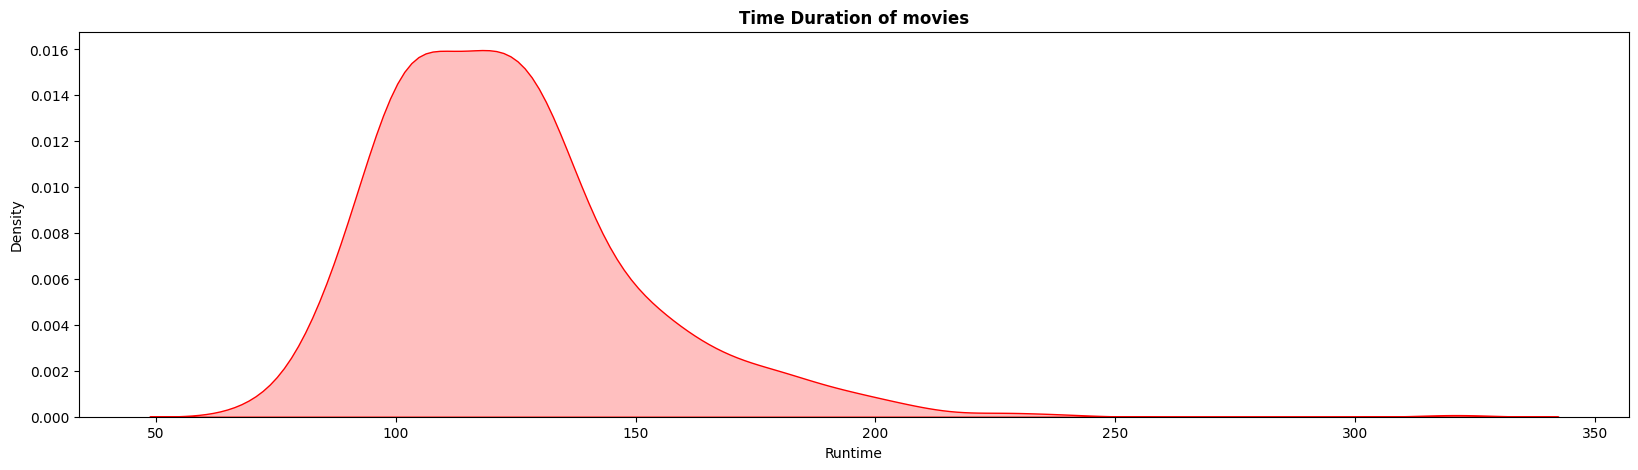

In [ ]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.kdeplot(df_runtime['Runtime'], fill=True, color="r")
g.set_title("Time Duration of movies", weight = "bold")

Summary: A greater amount of the top 1000 movies is between 100-130 minutes

Recommendation of if you were to produce a movie
Runtime:
Actors:
Diretors:
Genre:
Description type (pos/neut/neg):


With the increasing popularity of shorter content, it will be fascinating to witness the evolution of movies in the new era.

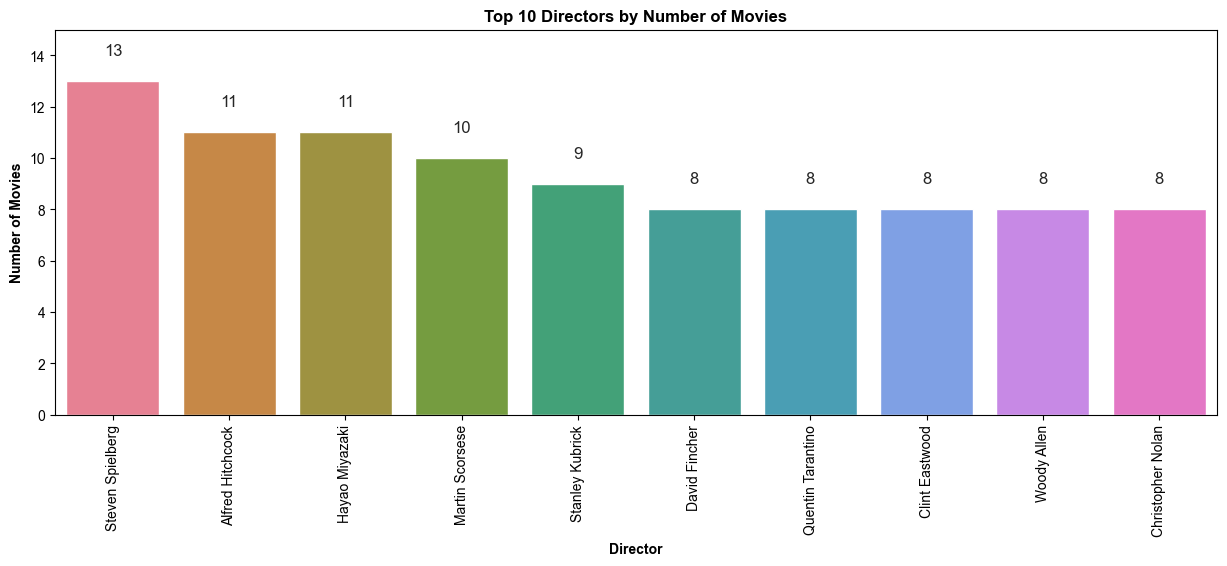

In [ ]:
# group by director and count the number of movies
df_director = df.groupby('Director')['Movie_Title'].count().sort_values(ascending=False)

# show in a histogram
fig, ax = plt.subplots(figsize=(15, 5))
sns.set_style("whitegrid")
sns.barplot(x=df_director[:10].index, y=df_director[:10].values, palette="husl", ax=ax)
ax.set_xticklabels(df_director[:10].index, rotation=90) # set x-tick labels
ax.set_title("Top 10 Directors by Number of Movies", fontweight="bold") # set title
ax.set_xlabel("Director", fontweight="bold") # set x-label
ax.set_ylabel("Number of Movies", fontweight="bold") # set y-label
ax.set_ylim([0, df_director[:10].max() + 2]) # set y-axis range
for index, value in enumerate(df_director[:10].values):
    plt.text(index, value + 1, str(value), ha='center', fontsize=12) # add value labels
plt.show()

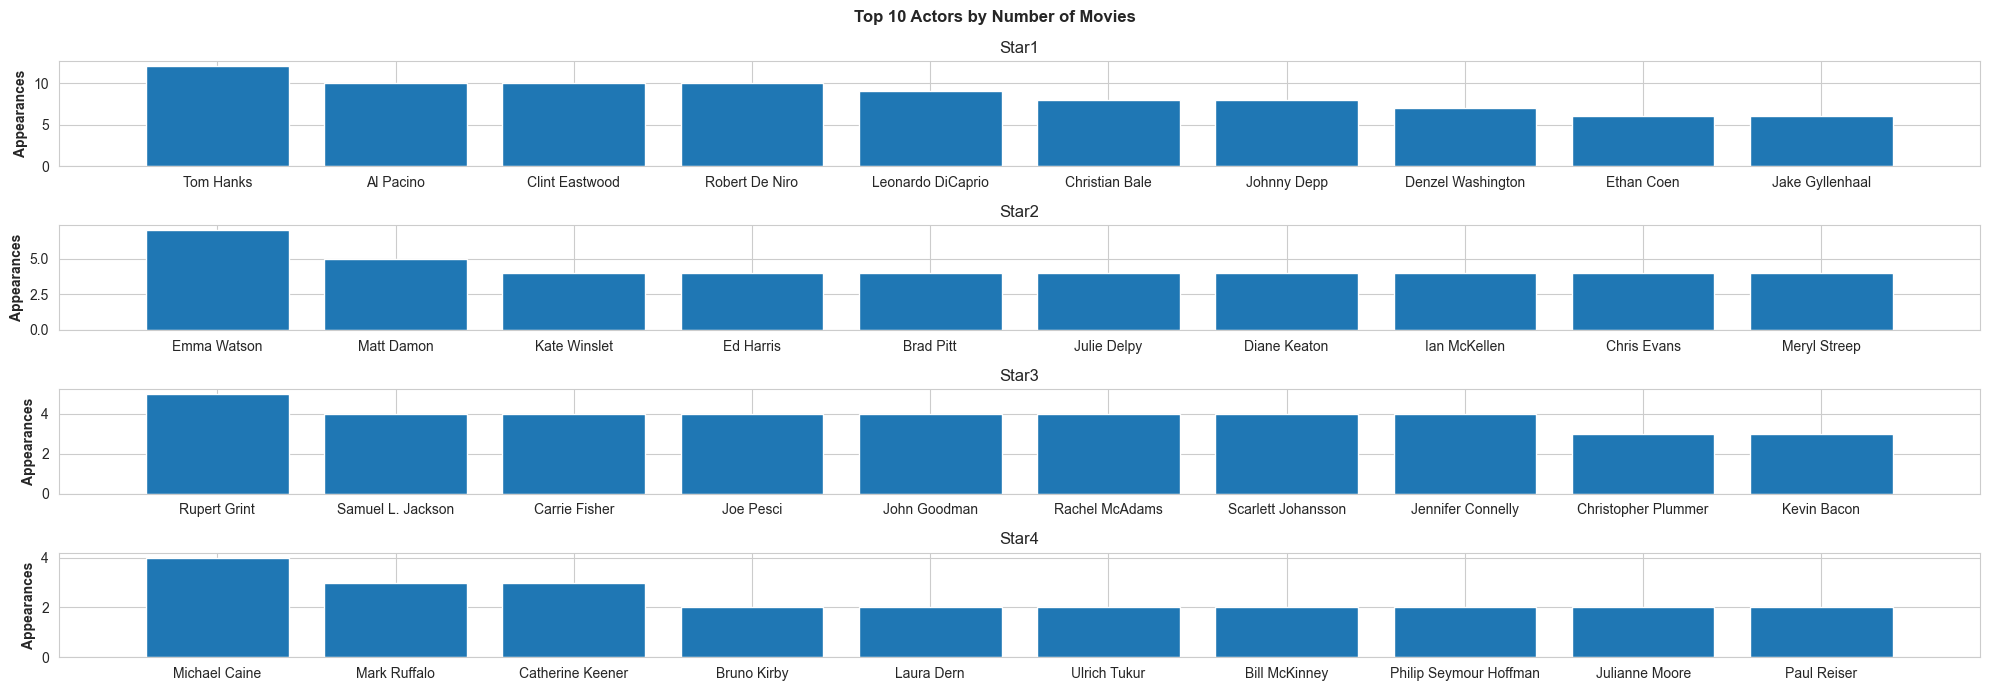

In [ ]:
# Who is the top actor?
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
#add title to entire chart
fig.suptitle("Top 10 Actors by Number of Movies", fontweight="bold")
for x in stars:
    axs[ax].bar(df[x].value_counts()[:10].index,df[x].value_counts()[:10])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()



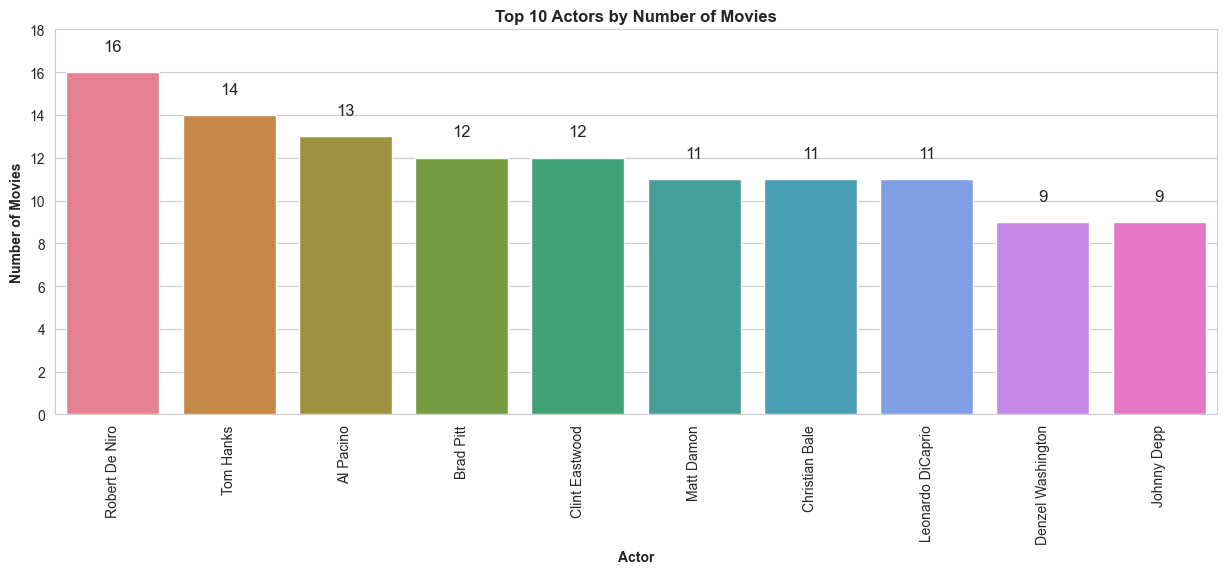

In [ ]:
# group star1, star2, star3 and star4 together nad explode
df_stars = df[['Star1', 'Star2', 'Star3', 'Star4']].stack().reset_index(level=1, drop=True).reset_index(name='Star')

#group top 10 actors
df_stars = df_stars.groupby('Star')['Star'].count().sort_values(ascending=False)[:10]

# show in a bar chart
fig, ax = plt.subplots(figsize=(15, 5))
sns.set_style("whitegrid")
sns.barplot(x=df_stars.index, y=df_stars.values, palette="husl", ax=ax)
ax.set_xticklabels(df_stars.index, rotation=90) # set x-tick labels
ax.set_title("Top 10 Actors by Number of Movies", fontweight="bold") # set title
ax.set_xlabel("Actor", fontweight="bold") # set x-label
ax.set_ylabel("Number of Movies", fontweight="bold") # set y-label
ax.set_ylim([0, df_stars.max() + 2]) # set y-axis range
for index, value in enumerate(df_stars.values):
    plt.text(index, value + 1, str(value), ha='center', fontsize=12) # add value labels
plt.show()




In [ ]:
# Split Genre and explode it
df['Genre'] = df['Genre'].str.split(', ')
df_explode = df.explode('Genre')
df_explode.head()

,Movie_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Decade,Year
0,The Shawshank Redemption,1994-01-01,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,1990,1994
1,The Godfather,1972-01-01,A,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,1970,1972
1,The Godfather,1972-01-01,A,175,Drama,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,1970,1972
2,The Dark Knight,2008-01-01,UA,152,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,2000,2008
2,The Dark Knight,2008-01-01,UA,152,Crime,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,2000,2008


/var/folders/5m/969g9vzx5wqgtqw6jdkrd07r0000gn/T/ipykernel_34624/2447450675.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_explode.groupby('Genre').mean().sort_values('compound', ascending=False)


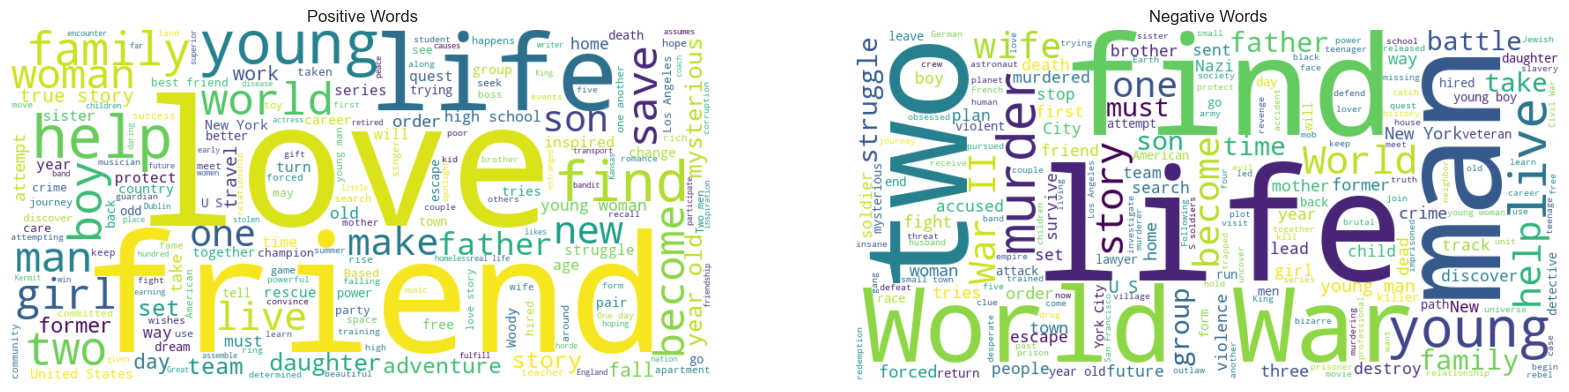

In [ ]:
# Perform sentiment analysis on the movie overviews
sia = SentimentIntensityAnalyzer()
compound_scores = [sia.polarity_scores(overview)['compound'] for overview in df_explode['Overview']]
df_explode['compound'] = compound_scores

# Group the movies by genre and calculate the mean compound score for each group
df_grouped = df_explode.groupby('Genre').mean().sort_values('compound', ascending=False)

# Generate word clouds for positive and negative words
positive_words = df_explode[df_explode['compound'] > 0]['Overview'].tolist()
negative_words = df_explode[df_explode['compound'] < 0]['Overview'].tolist()

# Plot the word clouds
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words)), interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words')

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words)), interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words')

plt.show()

/var/folders/5m/969g9vzx5wqgtqw6jdkrd07r0000gn/T/ipykernel_34624/1166851605.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_explode.groupby('Genre').mean().sort_values('compound', ascending=False)


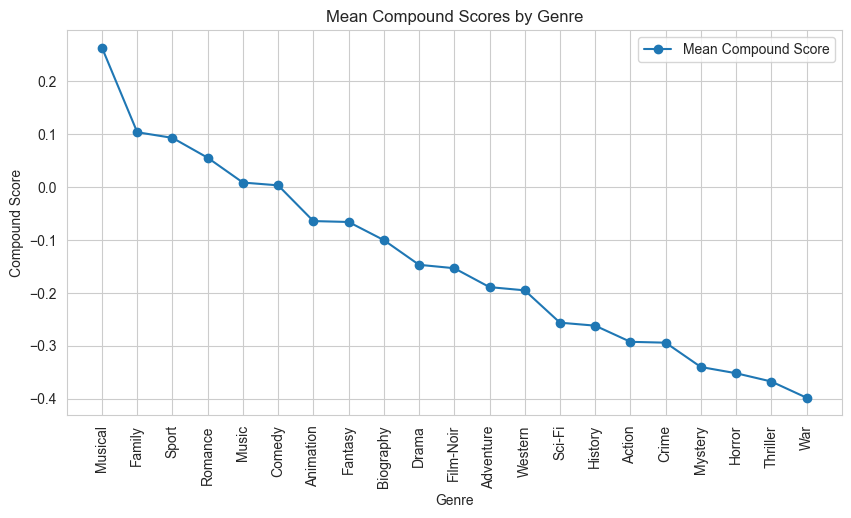

In [ ]:
# Group the data by genre and calculate the mean compound score for each group
df_grouped = df_explode.groupby('Genre').mean().sort_values('compound', ascending=False)

# Create a line chart of compound scores by genre
plt.figure(figsize=(10,5))
plt.plot(df_grouped.index, df_grouped['compound'], 'o-', label='Mean Compound Score')
plt.xlabel('Genre')
plt.ylabel('Compound Score')
plt.title('Mean Compound Scores by Genre')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Conclusion
# ---
# The movies in the Horror, Action, Crime, Mystery, Thriller and War language is negative.
# Compare to Musical, Sport, Music, Family, Romance and Comedy is positive.
# I would say this is faily obvious due to the nature of the genres.

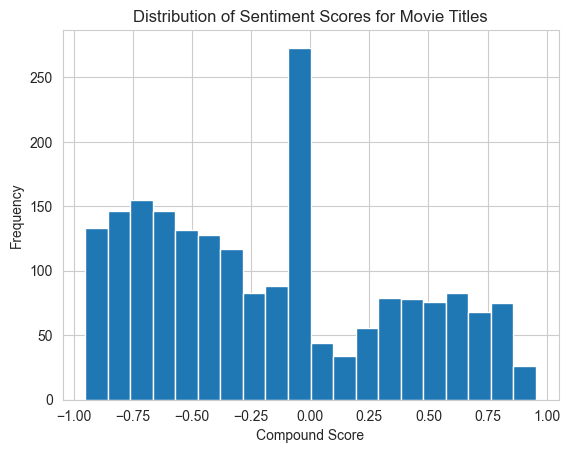

In [ ]:
# Show the frequency of the compound scores for each movie

plt.hist(df_explode['compound'], bins=20)
plt.title('Distribution of Sentiment Scores for Movie Titles')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()



EXPORT DATAFRAME TO .PKL

In [ ]:
# Use to_pickle to save the dataframe to a file
df.to_pickle('movies.pkl' protocol=4)


